<a href="https://www.kaggle.com/code/abhiram2000/major-pro?scriptVersionId=98018831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
# from zipfile import ZipFile

In [2]:
def yes():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('0')
def no():
    for i in tqdm(os.listdir()):
      img = cv2.imread(i)   
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append('1')

In [3]:
X = []
y = []

# os.chdir('/kaggle/input/braintumor/Train/Brain Tumor')
os.chdir('/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor')
yes()
os.chdir('/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy')
no()

os.chdir('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor')
no()

os.chdir('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor')
yes()
os.chdir('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor')
no()

os.chdir('/kaggle/input/brain-tumor-mri-dataset/Training/glioma')
yes()
os.chdir('/kaggle/input/brain-tumor-mri-dataset/Training/meningioma')
yes()
os.chdir('/kaggle/input/brain-tumor-mri-dataset/Training/pituitary')
yes()
os.chdir('/kaggle/input/brain-tumor-mri-dataset/Training/notumor')
no()

  0%|          | 0/2513 [00:00<?, ?it/s]

  0%|          | 0/2087 [00:00<?, ?it/s]

  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/1321 [00:00<?, ?it/s]

  0%|          | 0/1339 [00:00<?, ?it/s]

  0%|          | 0/1457 [00:00<?, ?it/s]

  0%|          | 0/1595 [00:00<?, ?it/s]

In [4]:
print(X[-1])
print(y[-1])

[[[254 254 254]
  [ 78  78  78]
  [111 111 111]
  ...
  [117 117 117]
  [117 117 117]
  [255 255 255]]

 [[197 197 197]
  [  0   0   0]
  [ 13  13  13]
  ...
  [  3   3   3]
  [  3   3   3]
  [254 254 254]]

 [[228 228 228]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [  8   8   8]
  [  8   8   8]
  [254 254 254]]

 ...

 [[247 247 247]
  [  0   0   0]
  [ 11  11  11]
  ...
  [  0   0   0]
  [ 16  16  16]
  [254 254 254]]

 [[216 216 216]
  [ 12  12  12]
  [  0   0   0]
  ...
  [ 19  19  19]
  [ 11  11  11]
  [254 254 254]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]]
1


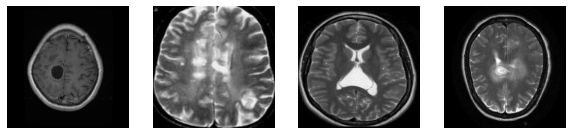

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (10182, 224, 224, 3)
X_test Shape:  (3394, 224, 224, 3)
y_train Shape:  (10182, 2)
y_test Shape:  (3394, 2)


In [7]:
from keras.applications import vgg16
from tensorflow import keras
img_rows, img_cols = 224, 224 
vgg = vgg16.VGG16(weights = 'imagenet',include_top = False,input_shape = (img_rows, img_cols, 3) )

2022-06-10 17:07:02.813320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 17:07:02.926128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 17:07:02.927076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 17:07:02.928875: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 1s 0us/step


In [8]:
for layer in vgg.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [9]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model

In [11]:
num_classes = 2
FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test,y_test))

2022-06-10 17:07:06.447007: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1532676096 exceeds 10% of free system memory.
2022-06-10 17:07:08.160410: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1532676096 exceeds 10% of free system memory.
2022-06-10 17:07:09.296576: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-10 17:07:10.957859: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


319/319 [==============================] - ETA: 0s - loss: 0.2258 - accuracy: 0.9347

2022-06-10 17:07:39.758407: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 510892032 exceeds 10% of free system memory.
2022-06-10 17:07:40.427789: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 510892032 exceeds 10% of free system memory.


319/319 [==============================] - 38s 89ms/step - loss: 0.2258 - accuracy: 0.9347 - val_loss: 0.0597 - val_accuracy: 0.9785
Epoch 2/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0569 - accuracy: 0.9802 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 3/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0321 - accuracy: 0.9889 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 4/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.0233 - val_accuracy: 0.9932
Epoch 5/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0331 - accuracy: 0.9907 - val_loss: 0.0790 - val_accuracy: 0.9862
Epoch 6/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0358 - val_accuracy: 0.9929
Epoch 7/10
319/319 [==============================] - 26s 81ms/step - loss: 0.0224 - accuracy: 0.9936 - val_loss: 0.0981 - val_accuracy: 0.9702
Epo

Training Accuracy :  0.9865743398666382
Validation Accuracy :  0.9869180917739868


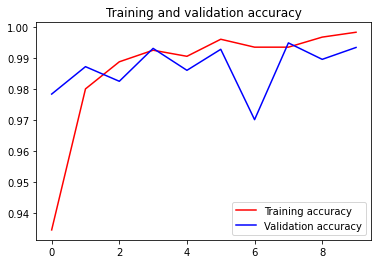

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
acc = history.history['accuracy']
print("Training Accuracy : ",mean(acc))
val_acc = history.history['val_accuracy']
print("Validation Accuracy : ",mean(val_acc))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [14]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

[[1.0000000e+00 4.1035104e-14]]
0
The MRI Image is Of BRAIN TUMOR


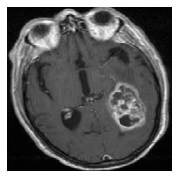

In [22]:
#Prediction for 1 image
#path='/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-noTr_0000.jpg'
path='/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0001.jpg'
img = image.load_img(path, target_size=(224,224))
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show
i = image.img_to_array(img)
input_arr = np.array([i])
predict_x=model.predict(input_arr)
class_x=np.argmax(predict_x)
print(predict_x)
print(class_x)
if(class_x == 0):
    print("The MRI Image is Of BRAIN TUMOR")
else:
    print("The MRI Image is Of HEALTHY BRAIN")

In [16]:
#Prediction of Dataset

def calc():
    count = 0
    true = 0
    false = 0
    for img1 in os.listdir():
        count = count+1
        img = image.load_img(img1, target_size=(224,224))
        i = image.img_to_array(img)
        input_arr = np.array([i])
        predict_x=model.predict(input_arr)
        class_x=np.argmax(predict_x)
        classes_x=np.round(predict_x)
        if class_x == 0:
            true = true+1
        else:
            false = false+1
    print("% of Brain Tumor images in given dataset : ",true*100/count)
    print("% of Healthy Brain images in given dataset : ",false*100/count)
    
os.chdir('/kaggle/input/brain-tumor-mri-dataset/Testing/glioma')
print("Brain Tumor Dataset")
print("-----------------------------------------")
calc();
print()
os.chdir('/kaggle/input/brain-tumor-mri-dataset/Testing/notumor')
print("Healthy Brain Dataset")
print("-----------------------------------------")
calc();

Brain Tumor Dataset
-----------------------------------------
% of Brain Tumor images in given dataset :  100.0
% of Healthy Brain images in given dataset :  0.0

Healthy Brain Dataset
-----------------------------------------
% of Brain Tumor images in given dataset :  0.9876543209876543
% of Healthy Brain images in given dataset :  99.01234567901234
